### Exploratory Data Analysis (EDA)

1. Univariate Analysis
2. Bi-variate Analysis
3. Multi-variate Analysis


* Input : Cleaned dataset from Notebook1 (inpt_df_processed.csv)
  Outcome: EDA Plots

In [2]:
# Import libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from scipy import stats

In [5]:
# Importing cleansed dataset
inpt_df=pd.read_csv('inpt_df_processed.csv')
inpt_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
# Creating list of features for plotting

num_col=['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
cat_cols=[ 'SEX', 'EDUCATION', 'MARRIAGE']
cat_num=[ 'SEX', 'EDUCATION', 'MARRIAGE','LIMIT_BAL','AGE']
pay_stat=['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
cat_pay_cols = [ 'SEX', 'EDUCATION', 'MARRIAGE','PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
y_col=['DEFAULT']
bill_amt=['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt=['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

### 1. Univariate Analysis

This dataset is skewed and has a lot of outliers in terms of limit balance, payment amount, and bill amount. However, this is not unusual in finance datasets so these observations are considered as relevant data points.

In [18]:
def univariate_eda(df, cols, n_cols = 3, figsize = None):
    
    # univariate eda for categorical features
    n_rows = len(cols)/n_cols
    total = float(len(df))
    
    plt.figure(figsize=(5*n_cols,5*n_rows))
    
    if figsize:
        plt.figure(figsize=figsize)
    
    for i in range(0,len(cols)):
        plt.subplot(n_rows+1, n_cols, (i+1))
        ax = sns.countplot(df[cols[i]], palette=["#3299CC", "#87CEFA", "#B2DFEE", "#BFEFFF"]) 
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:4.2f}%'.format(100 * p.get_height()/(len(inpt_df))),
            ha="center") 
    plt.show()

In [8]:
def distplot_eda(df, cols, n_cols = 3, figsize = None):

    n_rows = len(cols)/n_cols
    plt.figure(figsize=(5*n_cols,5*n_rows))
    
    if figsize:
        plt.figure(figsize=figsize)
    
    for i in range(0,len(cols)):
        plt.subplot(n_rows+1, n_cols, (i+1))
        sns.kdeplot(df[cols[i]])
    
    plt.show()

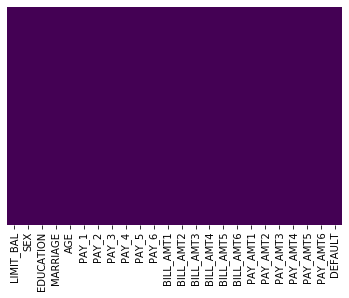

In [9]:
# Missing values check - The heapmap shows that there are no null values in any of the columns of the dataset

sns.heatmap(inpt_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##### (1) How is the class distribution of Target variable?

The distribution of target variable 'DEFAULT' is 22.12% of the intire population. This makes the dataset class imbalaced and requires 
re-sampling methods before modelling.

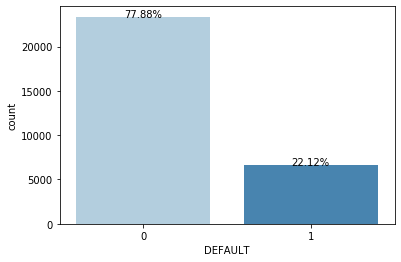

In [15]:
#--------------------------------------------------------------
# Target variable - DEFAULT
#--------------------------------------------------------------

ax = sns.countplot(inpt_df['DEFAULT'], palette="Blues")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:4.2f}%'.format(100 * p.get_height()/(len(inpt_df))),
            ha="center") 

##### (2) How are the numerical variables distributed?

    # The values and distribution of Age variable looks legit with majority card holders in 28-41 age group.
    # The difference in limit balance between first 75% and last 25% seems very high. But their corresponding Bill amounts 
        and payment amounts being high as well.   
    # Min value of Payment amounts is 0 - which is correct
    # Min value of bill amounts is negative which needs to be verified
    # Max value in Bill_amt3 and Pay_amt2 are comparatively high. However the mean values of all 6 months are similar.

    # The graphs show right skewed distribution for all the numerical variables. 

In [25]:
inpt_df.loc[:,num_col].describe().astype (int)

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
mean,167484,35,51223,49179,47013,43262,40311,38871,5663,5921,5225,4826,4799,5215
std,129747,9,73635,71173,69349,64332,60797,59554,16563,23040,17606,15666,15278,17777
min,10000,21,-165580,-69777,-157264,-170000,-81334,-339603,0,0,0,0,0,0
25%,50000,28,3558,2984,2666,2326,1763,1256,1000,833,390,296,252,117
50%,140000,34,22381,21200,20088,19052,18104,17071,2100,2009,1800,1500,1500,1500
75%,240000,41,67091,64006,60164,54506,50190,49198,5006,5000,4505,4013,4031,4000
max,1000000,79,964511,983931,1664089,891586,927171,961664,873552,1684259,896040,621000,426529,528666


<Figure size 1080x1680 with 0 Axes>

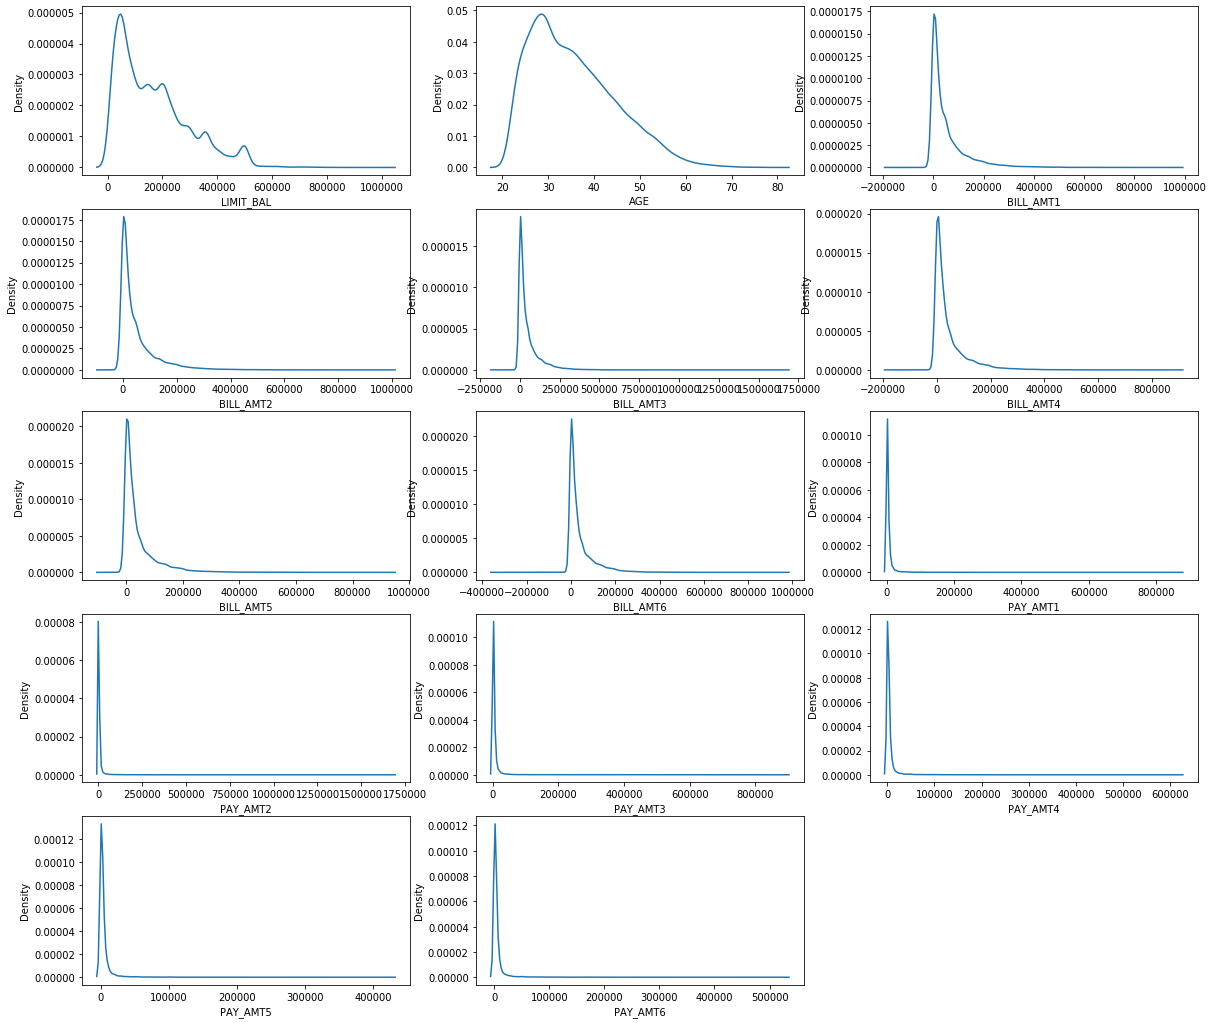

In [71]:
distplot_eda(inpt_df, num_col, n_cols = 3, figsize = (20,18))

##### (3) How are the Demographic variables and payment status distributed?

    # The percentage of female card holders is greatly higher than the male card holders.
    # Majority of the card holders are University graduates followed by graduate school and high school pass outs.
    # There are more single card holders than married card holders

    # Mostly all payments seem regular with status 0 constituting to 77.88% non-default rate.
    # After status 0- status 1,2,3 shows prominent population indicating majority of records in lesser deliquent months,
      while remaining status shows negligible numbers. The status 9 is not part of dataset.

In [17]:
demo = pd.crosstab(columns=inpt_df["EDUCATION"], index=[inpt_df["SEX"], inpt_df["MARRIAGE"]], margins=True)
print('\n',"Distribution of demographic variables",'\n','\n', demo)

inpt_df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']].apply(pd.Series.value_counts)


 Distribution of demographic variables 
 
 EDUCATION         1      2     3    4    All
SEX MARRIAGE                                
1   1          1690   2370  1048   82   5190
    2          2633   2940   894   86   6553
    3            31     64    48    2    145
2   1          2032   4472  1813  152   8469
    2          4176   4080  1015  140   9411
    3            23    104    99    6    232
All           10585  14030  4917  468  30000


,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,23182,25562,25787,26490,27032.0,26921.0
1,3688,28,4,2,NaN,NaN
2,2667,3927,3819,3159,2626.0,2766.0
3,322,326,240,180,178.0,184.0
4,76,99,76,69,84.0,49.0
5,26,25,21,35,17.0,13.0
6,11,12,23,5,4.0,19.0
7,9,20,27,58,58.0,46.0
8,19,1,3,2,1.0,2.0


<Figure size 1080x1080 with 0 Axes>

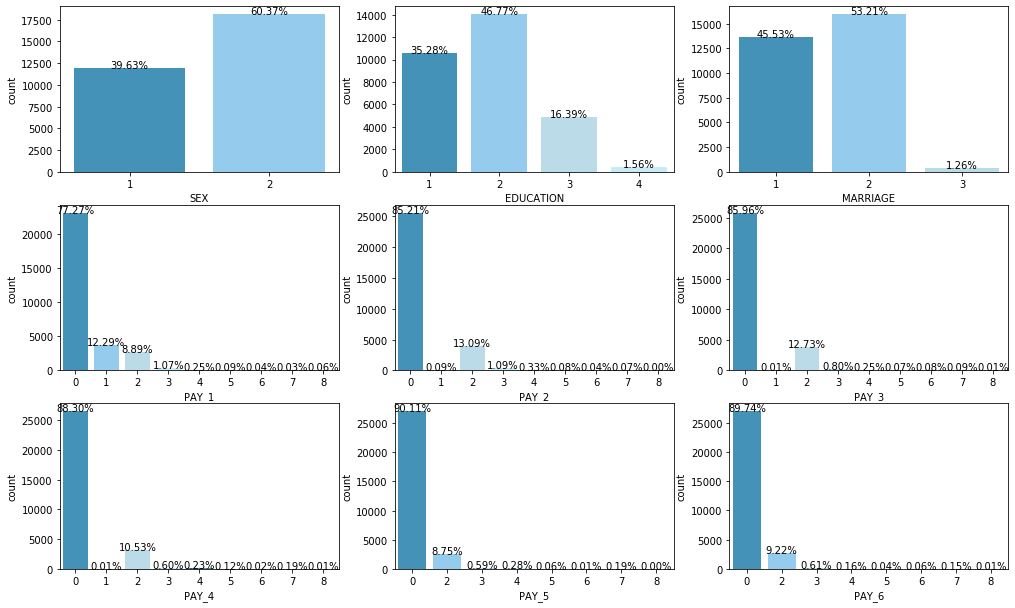

In [19]:
#--------------------------------------------------------------
# PAY_x (Payment Status) and  SEX, EDUCATION and MARRIAGE
#--------------------------------------------------------------

univariate_eda(inpt_df, cat_pay_cols, n_cols = 3, figsize = (17,14))

##### (3) Why are there negative bills?

    #The minimal values of the 6 bill columns are negative numbers. In general, there are total 3932 bills having 590-688 bills with negative amounts each month, which is less than 2% of total 30,000 records monthly. Also, the average negative amount in USD is 1154 NTD to 3074 NTD which is $40-$107 which is a small amount. Therefore, considering these values either as refunds from the last billing cycle or pre-payment/over-payment of bills to temporarily carry a negative balance.

    #From the below boxplot it is evident that BILL_AMTx and PAY_AMTx variables have outliers. To fix the outliers, TOP coding method will be incorporated as their data distribution is right skewed.

In [38]:
# Checking how many records have Negative Bill Amounts

bills = inpt_df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
bills_dist = pd.melt(bills, var_name = 'Bill_cycle',value_name = 'Bill amount')
neg_bill = bills_dist[bills_dist['Bill amount']<0]
print(neg_bill.groupby('Bill_cycle').count())

# Check average amount of negative bill each month
print('\n','Average negative amounts in NTD are: {}'.format(neg_bill.groupby('Bill_cycle')['Bill amount'].mean()))

            Bill amount
Bill_cycle             
BILL_AMT1           590
BILL_AMT2           669
BILL_AMT3           655
BILL_AMT4           675
BILL_AMT5           655
BILL_AMT6           688

 Average negative amounts in NTD are: Bill_cycle
BILL_AMT1   -1154.796610
BILL_AMT2   -1230.621824
BILL_AMT3   -1466.291603
BILL_AMT4   -1631.242963
BILL_AMT5   -1634.708397
BILL_AMT6   -3074.492733
Name: Bill amount, dtype: float64


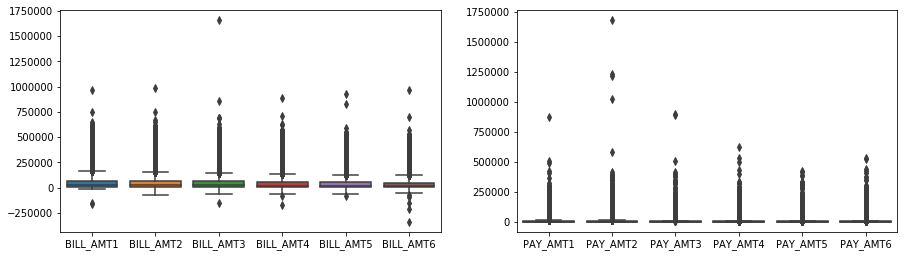

In [7]:
#--------------------------------------------------------------
# 6 months BILL_AMTx and PAY_AMTx
#--------------------------------------------------------------

plt.figure(figsize=(15,9))

plt.subplot(2,2,1)
sns.boxplot(data=inpt_df[bill_amt])

plt.subplot(2,2,2)
sns.boxplot(data=inpt_df[pay_amt])

### 2. Bivariate Analysis

In [50]:
def bivariate_eda(df, cols, hue, n_cols = 3, figsize = None):

    n_rows = len(cols)/n_cols
    plt.figure(figsize=(5*n_cols,5*n_rows))
    
    if figsize:
        plt.figure(figsize=figsize)
    
    for i in range(0,len(cols)):
        plt.subplot(n_rows+1, n_cols, (i+1))
        sns.countplot(x=df[cols[i]],hue=df[hue],palette="Blues")
 
    plt.show()

In [43]:
def stripplot_eda(df, cols, n_cols = 3, figsize = None):

    n_rows = len(cols)/n_cols
    plt.figure(figsize=(5*n_cols,5*n_rows))
    if figsize:
        plt.figure(figsize=figsize)

    for i in range(0,len(cols)):
        plt.subplot(n_rows+1, n_cols, (i+1))
        sns.stripplot(x=inpt_df.DEFAULT,y=df[cols[i]],jitter=True, color='skyblue')
    
    plt.show()

##### (4) Why are some Bill statement amounts greater than Credit limit?

    # There are 3931 records with Bills higher than Limit balance, out of which 1183 are default cases. This situation might be hapenning due to Banks allowing over-draw facility by charging over limit fees instead of declining the transaction. It can also be due to late payment interest of delayed payments. Hence these records are is retained as such.

In [40]:
# Checking if Bill amount is greater than credit limit

bill_gt_limit = inpt_df[(inpt_df['BILL_AMT1'] > inpt_df['LIMIT_BAL'])|(inpt_df['BILL_AMT2'] > inpt_df['LIMIT_BAL'])|
                     (inpt_df['BILL_AMT3'] > inpt_df['LIMIT_BAL'])|(inpt_df['BILL_AMT4'] > inpt_df['LIMIT_BAL'])|
                     (inpt_df['BILL_AMT5'] > inpt_df['LIMIT_BAL'])|(inpt_df['BILL_AMT6'] > inpt_df['LIMIT_BAL'])] 
print('Records with Bill amount greater than Credit limit: {}'.format(bill_gt_limit["DEFAULT"].value_counts()))

Records with Bill amount greater than Credit limit: 0    2748
1    1183
Name: DEFAULT, dtype: int64


#### (5) Why does customers with no consumption in 6 months / customers with no payment delays default in the next month?

    # There are 870 customers who were inactive in 6 months. But however 317 of them are marked to be default in the next month.
    # There are 2334 customer records where Payment status is 0 but still the customers are marked Default.
    
In conclusion there is a clear lack of sufficient information about the criteria for marking records as default.

In [108]:
zero_trans = inpt_df[inpt_df[bill_amt].sum(axis=1) ==0]
print('No of Customer with zero transaction in 6 months',zero_trans.count().head(1))
zero_trans_df = inpt_df.loc[zero_trans.index,['DEFAULT']]
zero_trans_df['DEFAULT'].value_counts()

No of Customer with zero transaction in 6 months LIMIT_BAL    870
dtype: int64


0    553
1    317
Name: DEFAULT, dtype: int64

In [110]:
zero_paystat = inpt_df[inpt_df[pay_stat].sum(axis=1) ==0]
zero_paystat_df = inpt_df.loc[zero_paystat.index,['DEFAULT']]
zero_paystat_df['DEFAULT'].value_counts()

0    17597
1     2334
Name: DEFAULT, dtype: int64

##### (6) Which gender group tends to have more delayed payments? Does education level inluence Defaults ?  Does marital status have anything to do with default risk? 

    # The difference between 2 genders wrt delayed payments is not significant.
    # The data indicates customers with lower education levels tend to default more. Customers with high school and university   educational level have higher default percentages than customers with grad school education did.
    # There is no significant difference of default risk in terms of marital status.

In Conclusion, the demographic variables are not giving any significant information regarding the default risk

<Figure size 1080x360 with 0 Axes>

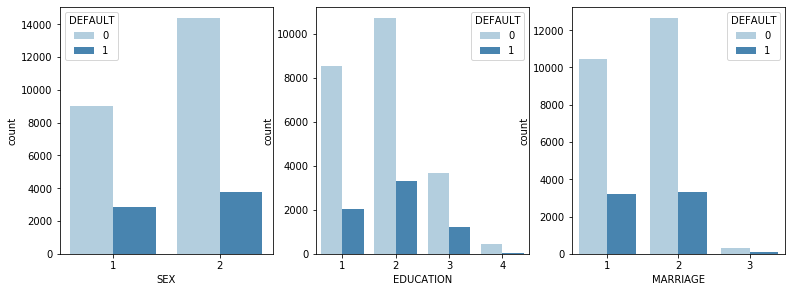

In [54]:
#--------------------------------------------------------------
# Categorical variables Vs Default
#--------------------------------------------------------------

bivariate_eda(inpt_df, cat_cols, 'DEFAULT', n_cols = 3, figsize = (13,10))

##### (7) Does higher credit limit leads to defaults ? Do younger people tend to miss the payment deadline?

    # The younger groups (20-30) and older groups (50-70) show higher delayed payment rates, while customers aged between 
      30-50 and over 70 show lower delayed payment rates.
    # The percentage of defaults are more with lesser credit limit. Customers who had higher credit limits had lower delayed payment rates.

Text(0.5, 1.0, 'credit limit by default')

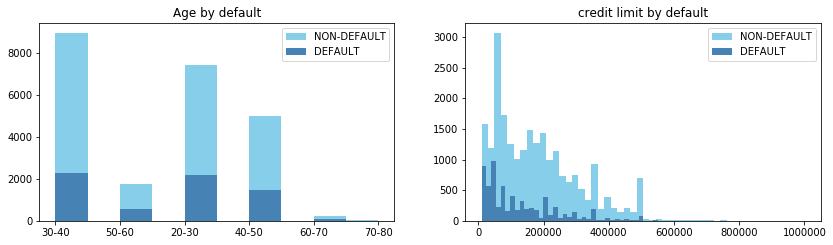

In [59]:
#--------------------------------------------------------------
# Age and Limit Bal Vs Default
#--------------------------------------------------------------

plt.figure(figsize = (14,8))

plt.subplot(2,2,1)
bins= [21,30,40,50,60,70,80]
labels = ['20-30','30-40','40-50','50-60','60-70','70-80']
inpt_df['AGE_BIN'] = pd.cut(inpt_df['AGE'],bins=bins, labels=labels,right=False)
plt.hist(inpt_df[inpt_df['DEFAULT']==0]['AGE_BIN'], color = 'skyblue')
plt.hist(inpt_df[inpt_df['DEFAULT']==1]['AGE_BIN'], color = 'steelblue')
plt.legend(["NON-DEFAULT", "DEFAULT"])
plt.title('Age by default')

plt.subplot(2,2,2)
class_0 = inpt_df[inpt_df['DEFAULT']==0]['LIMIT_BAL']
class_1 = inpt_df[inpt_df['DEFAULT']==1]['LIMIT_BAL']
plt.hist(class_0, bins = 50, color = 'skyblue')
plt.hist(class_1, bins = 50, color = 'steelblue')
plt.legend(["NON-DEFAULT", "DEFAULT"])
plt.title('credit limit by default')

#### (8) Does customers demographics influence higher credit limits?

    # Customers with grad school education have proven that customers with higher education levels did get higher credit limits.
    # Single customers show greater credit limit than married ones.
    # Credit limit of Women customers is higher than men.

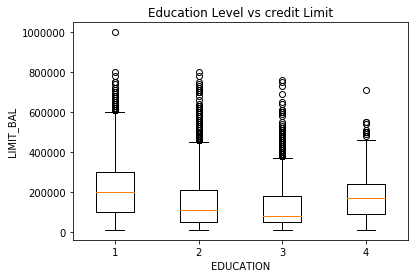

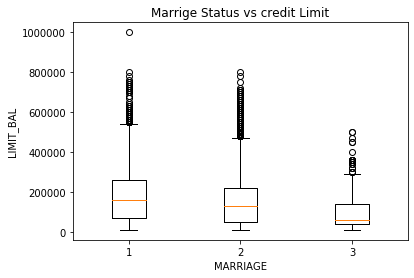

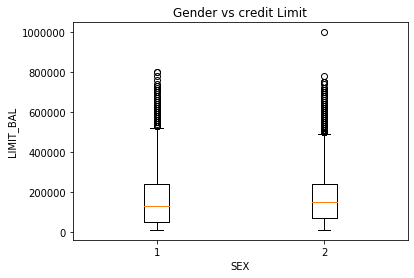

In [76]:
data1 = []
for i in [1,2,3,4]:
    temp = inpt_df.loc[inpt_df.EDUCATION == i, "LIMIT_BAL"]
    data1.append(temp)

fig, ax = plt.subplots()
ax.boxplot(data1)
ax.set_title('Education Level vs credit Limit')
ax.set_xlabel('EDUCATION')
ax.set_ylabel('LIMIT_BAL')
plt.show()

data2 = []
for i in [1,2,3]:
    temp = inpt_df.loc[inpt_df.MARRIAGE == i, "LIMIT_BAL"]
    data2.append(temp)

fig, ax = plt.subplots()
ax.boxplot(data2)
ax.set_title('Marrige Status vs credit Limit')
ax.set_xlabel('MARRIAGE')
ax.set_ylabel('LIMIT_BAL')
plt.show()

data2 = []
for i in [1,2]:
    temp = inpt_df.loc[inpt_df.SEX == i, "LIMIT_BAL"]
    data2.append(temp)

fig, ax = plt.subplots()
ax.boxplot(data2)
ax.set_title('Gender vs credit Limit')
ax.set_xlabel('SEX')
ax.set_ylabel('LIMIT_BAL')
plt.show()

#### (9) How is the distribution of Payment delays of 6 months resulting in Defaults?

    # Pay_6 to PAY_5 shows gradual increase whereas a huge jump is seen from PAY_5 to PAY_3 and PAY_5 when delayed payment increased significantly. It peaked at PAY_2 and PAY_1. Thus the significant increase in default cases every month resulted in financial depression as detailed in base paper.

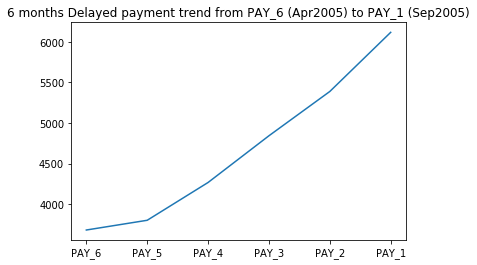

In [83]:
# Subset a dataframe with the records that have default

def_payments = inpt_df[inpt_df['DEFAULT']== 1][['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1']].sum(axis=0)

fig,ax = plt.subplots()
ax.plot(def_payments)
plt.title('6 months Delayed payment trend from PAY_6 (Apr2005) to PAY_1 (Sep2005)')
plt.show()

### C. Multivariate Analysis

    # Defaults are found at a higher rate among accounts with payment delay and at lower rate among accounts with no payment delay.
    # Breaking Default cases down with demographic levels, it reveals that the both male and female customers with university education shows a larger percentage of defaults than with gradute scool education. However the number of default cases are more with female customers.
    # There is no clear indication of marriage level affecting wrt Education and gender to result in defaults.

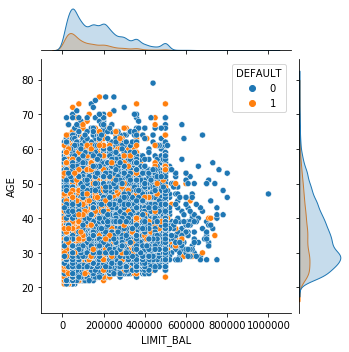

In [117]:
#--------------------------------------------------------------
# AGE VS CREDIT LIMIT VS DEFAULT
#--------------------------------------------------------------

sns.jointplot(data = inpt_df, x="LIMIT_BAL", y ="AGE", hue = "DEFAULT", height=5)

<Figure size 576x288 with 0 Axes>

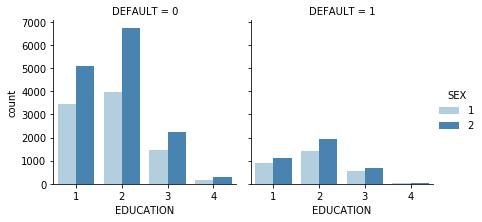

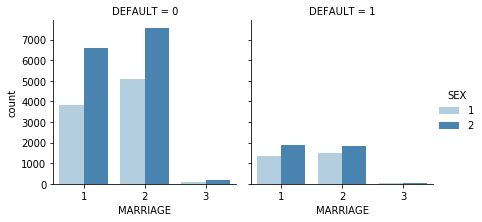

In [116]:
#--------------------------------------------------------------
# MARRIAGE VS EDUCATION VS SEX VS DEFAULT
#--------------------------------------------------------------

plt.figure(figsize=(8,4))
ax1=sns.catplot(x='EDUCATION' , hue='SEX', col = 'DEFAULT', data = inpt_df, kind = 'count', palette="Blues", height=3)
ax2=sns.catplot(x='MARRIAGE' , hue='SEX', col = 'DEFAULT', data = inpt_df, kind = 'count', palette="Blues", height=3)